In [6]:
import os
import numpy as np

myDir="C:/Users/Julie/OneDrive - HESSO/General/5.ML/Resultats_Kaggle/epochs_results_TPU_version_30"
testAcc=np.load(os.path.join(myDir, "epoch_test_accuracies.npy"))
testLoss=np.load(os.path.join(myDir, "epoch_test_losses.npy"))
trainAcc=np.load(os.path.join(myDir, "epoch_train_accuracies.npy"))
trainLoss=np.load(os.path.join(myDir, "epoch_train_losses.npy"))

In [7]:
meanAccTest, stdAccTest = np.mean(testAcc, axis=0), np.std(testAcc, axis=0)
meanLossTest, stdLossTest = np.mean(testLoss, axis=0), np.std(testLoss, axis=0)

meanAccTrain, stdAccTrain = np.mean(trainAcc, axis=0), np.std(trainAcc, axis=0)
meanLossTrain, stdLossTrain = np.mean(trainLoss, axis=0), np.std(trainLoss, axis=0)


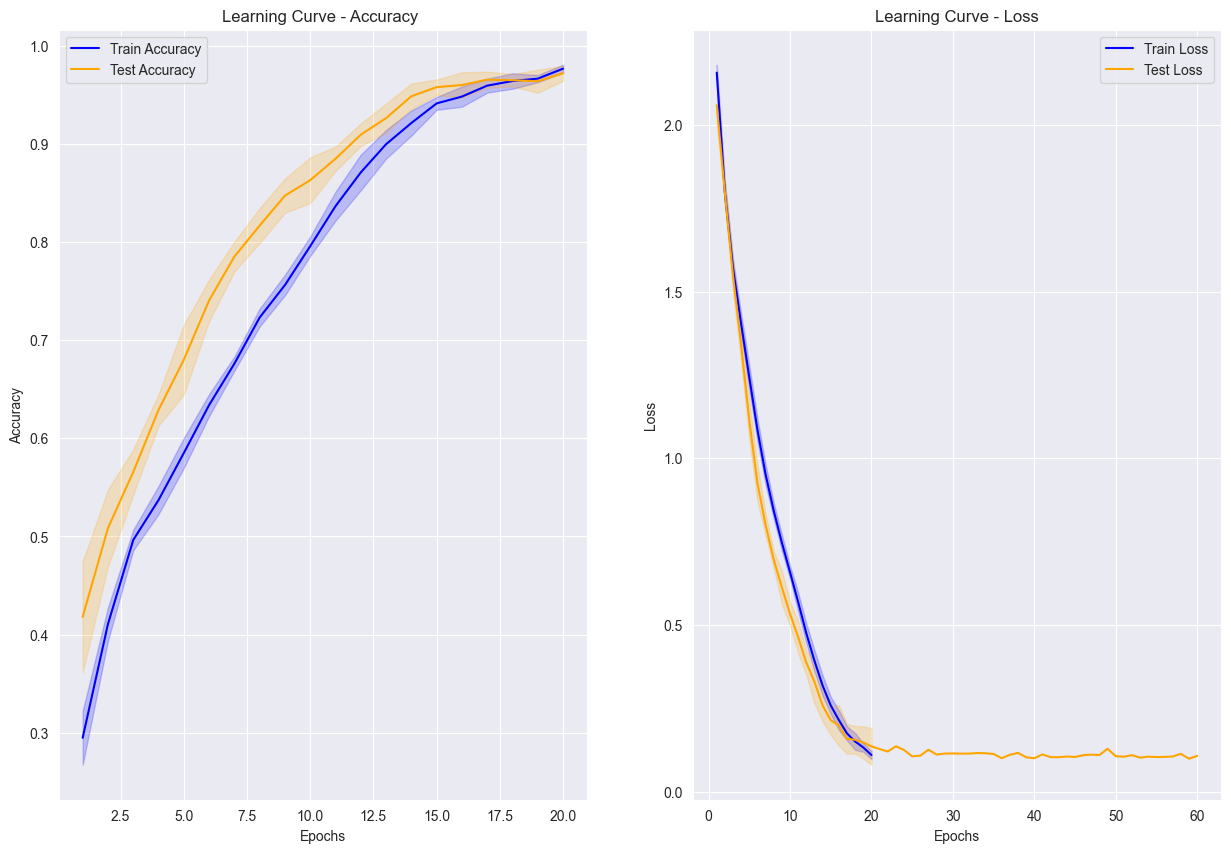

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

epochs=np.arange(1, testAcc.shape[1]+1)
plt.subplot(1, 2, 1)
plt.plot(epochs[:20], meanAccTrain[:20], label="Train Accuracy", color="blue")
plt.fill_between(epochs[:20], meanAccTrain[:20]-stdAccTrain[:20],meanAccTrain[:20]+stdAccTrain[:20],alpha=0.2, color="blue")

plt.plot(epochs[:20], meanAccTest[:20], label="Test Accuracy", color="orange")
plt.fill_between(epochs[:20], meanAccTest[:20]-stdAccTest[:20],meanAccTest[:20]+stdAccTest[:20],alpha=0.2, color="orange")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Accuracy ")
plt.legend()

# Loss curve for test and train
plt.subplot(1, 2, 2)

plt.plot(epochs[:20], meanLossTrain[:20], label="Train Loss", color="blue")
plt.fill_between(epochs[:20], meanLossTrain[:20]-stdLossTrain[:20],meanLossTrain[:20]+stdLossTrain[:20],alpha=0.2, color="blue")

plt.plot(epochs, meanLossTest, label="Test Loss", color="orange")
plt.fill_between(epochs[:20], meanLossTest[:20]-stdLossTest[:20],meanLossTest[:20]+stdLossTest[:20],alpha=0.2, color="orange")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve - Loss")
plt.legend()


In [12]:
import pickle

myDir="C:/Users/Julie/OneDrive - HESSO/General/5.ML/Resultats_Kaggle/sizes_results_TPU_version39"
with open(os.path.join(myDir, "sizes_test_accuracies.pickle"), 'rb') as handle:
    sizeTestAcc = pickle.load(handle)
with open(os.path.join(myDir, "sizes_test_losses.pickle"), 'rb') as handle:
    sizeTestLoss = pickle.load(handle)
with open(os.path.join(myDir, "sizes_train_accuracies.pickle"), 'rb') as handle:
    sizeTrainAcc = pickle.load(handle)
with open(os.path.join(myDir, "sizes_train_losses.pickle"), 'rb') as handle:
    sizeTrainLoss = pickle.load(handle)

In [26]:
meanTestAcc=[]
stdTestAcc=[]
meanTestLoss=[]
stdTestLoss=[]
meanTrainAcc=[]
stdTrainAcc=[]
meanTrainLoss=[]
stdTrainLoss=[]
keysList=[]
for keys, value in sizeTestAcc.items():
    keysList.append(keys)
    mean_key=np.mean(value, axis=0)
    std_key=np.std(value, axis=0)
    meanTestAcc.append(mean_key)
    stdTestAcc.append(std_key)
for keys, value in sizeTestLoss.items():
    mean_key=np.mean(value, axis=0)
    std_key=np.std(value, axis=0)
    meanTestLoss.append(mean_key)
    stdTestLoss.append(std_key)
for keys, value in sizeTrainAcc.items():
    mean_key=np.mean(value, axis=0)
    std_key=np.std(value, axis=0)
    meanTrainAcc.append(mean_key)
    stdTrainAcc.append(std_key)
for keys, value in sizeTrainLoss.items():
    mean_key=np.mean(value, axis=0)
    std_key=np.std(value, axis=0)
    meanTrainLoss.append(mean_key)
    stdTrainLoss.append(std_key)

In [33]:
meanTestAccLast=[]
stdTestAccLast=[]
meanTestLossLast=[]
stdTestLossLast=[]
meanTrainAccLast=[]
stdTrainAccLast=[]
meanTrainLossLast=[]
stdTrainLossLast=[]


for i, val in enumerate(meanTestAcc):
    meanTestAccLast.append(meanTestAcc[i][-1])
    stdTestAccLast.append(stdTestAcc[i][-1])
    meanTestLossLast.append(meanTestLoss[i][-1])
    stdTestLossLast.append(stdTestLoss[i][-1])
    meanTrainAccLast.append(meanTrainAcc[i][-1])
    stdTrainAccLast.append(stdTrainAcc[i][-1])
    meanTrainLossLast.append(meanTrainLoss[i][-1])
    stdTrainLossLast.append(stdTrainLoss[i][-1])
  
meanTestAccLast=np.array(meanTestAccLast)
stdTestAccLast=np.array(stdTestAccLast)
meanTestLossLast=np.array(meanTestLossLast)
stdTestLossLast=np.array(stdTestLossLast)
meanTrainAccLast=np.array(meanTrainAccLast)
stdTrainAccLast=np.array(stdTrainAccLast)
meanTrainLossLast=np.array(meanTrainLossLast)
stdTrainLossLast=np.array(stdTrainLossLast)

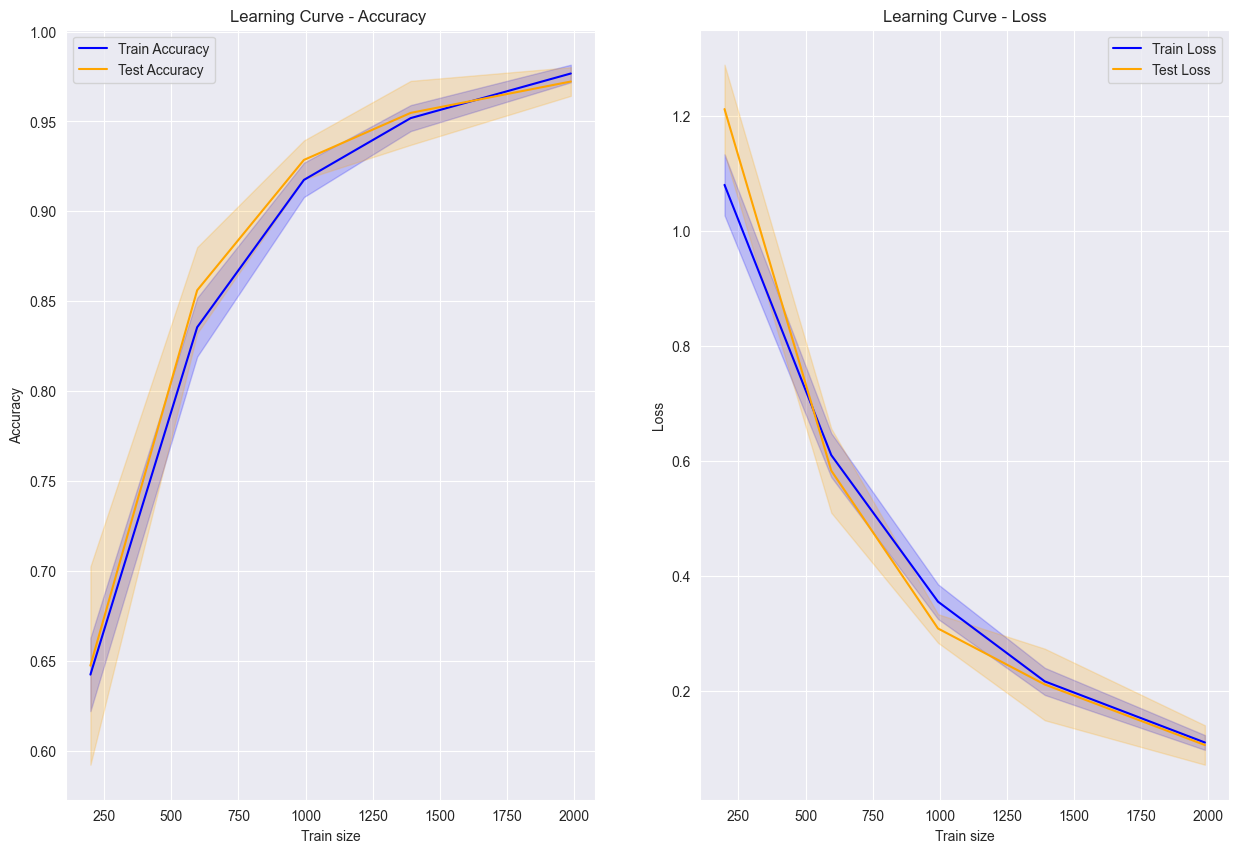

In [34]:
plt.figure(figsize=(15, 10))
trainLen=1989
keysList=np.array(keysList)
trainSizes=[int(trainLen*keys) for keys in keysList]

plt.subplot(1, 2, 1)
plt.plot(trainSizes, meanTrainAccLast, label="Train Accuracy", color="blue")
plt.fill_between(trainSizes, meanTrainAccLast-stdTrainAccLast,meanTrainAccLast+stdTrainAccLast,alpha=0.2, color="blue")

plt.plot(trainSizes, meanTestAccLast, label="Test Accuracy", color="orange")
plt.fill_between(trainSizes, meanTestAccLast-stdTestAccLast,meanTestAccLast+stdTestAccLast,alpha=0.2, color="orange")

plt.xlabel("Train size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Accuracy ")
plt.legend()

# Loss curve for test and train
plt.subplot(1, 2, 2)

plt.plot(trainSizes, meanTrainLossLast, label="Train Loss", color="blue")
plt.fill_between(trainSizes, meanTrainLossLast-stdTrainLossLast,meanTrainLossLast+stdTrainLossLast,alpha=0.2, color="blue")

plt.plot(trainSizes, meanTestLossLast, label="Test Loss", color="orange")
plt.fill_between(trainSizes, meanTestLossLast-stdTestLossLast,meanTestLossLast+stdTestLossLast,alpha=0.2, color="orange")

plt.xlabel("Train size")
plt.ylabel("Loss")
plt.title("Learning Curve - Loss")
plt.legend()